In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import butter, sosfilt, stft, welch
from scipy.optimize import curve_fit

In [3]:
def get_psd(data, channel=1):
    fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
    nperseg = fs / 10
    
    ff, pp = welch(data[channel], fs=fs, nperseg=nperseg)
    return ff, pp

def peak_amplitude_stft(tod, fs, nperseg, driving_freq):
    
    ff, tt, Zxx = stft(tod, fs=fs, nperseg=nperseg)
    sig = np.abs(Zxx)
    # f = np.where(ff==driving_freq)[0][0]
    f = np.argmin(np.abs(ff - driving_freq))

    # time, peak amplitude^2, sample frequency, sftp
    return tt, sig[f], ff, Zxx[f]

In [4]:
def plot_peak_amp(data, drive_freq, filtered=True):
    fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
    nperseg = fs / 5
    # nperseg = fs
    
    if filtered:
        f_hp = 1000
        sos_hp = butter(4, f_hp, 'hp', fs=fs, output='sos')
        dd = sosfilt(sos_hp, data[1])
    else:
        dd = data[1]

    tt, sig, ff, Zxx = peak_amplitude_stft(dd, fs, nperseg, drive_freq)
    
    fig, ax = plt.subplots(figsize = (20, 6))
    ax.grid()
    ax.plot(tt, sig, 'r.', markersize=15)

    ax.set_xlabel('Time (s)', fontsize=18)
    ax.set_ylabel(f'Peak amplitude@{int(drive_freq/1000)} kHz (V)', fontsize=18)
    # ax.set_title('0.1 mbar, driving field = 10 V peak to peak', fontsize=20)
    
    return fig, ax

In [132]:
def quad_demod_fourier(data, fdrive, z_channel=1 ,drive_channel=3):
    fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
    nperseg = int(fs / 2.5)
    
    ff, tt, Zxx_sig = stft(data[z_channel], fs=fs, nperseg=nperseg)
    ff, tt, Zxx_carr = stft(data[drive_channel], fs=fs, nperseg=nperseg)
    Zxx_carr_shifted = Zxx_carr * np.exp(-1j * np.pi / 2)

    corr_i = Zxx_sig * np.conjugate(Zxx_carr)
    corr_q = Zxx_sig * np.conjugate(Zxx_carr_shifted)

    farg = np.argmin(np.abs(ff - fdrive))
    delta_arg = 50
    
    ii, qq = np.zeros(tt.size), np.zeros(tt.size)
    for i in range(tt.size):
        ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
        qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])

    amp = np.sqrt(ii**2 + qq**2)
    phase = np.arctan2(qq, ii)

    return tt, amp, phase

## Determine the charge state of the nanosphere

In [5]:
drive_freq = 72000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240306_charging_40vp2p_1mbar_0vbias.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_25200\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_25200\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


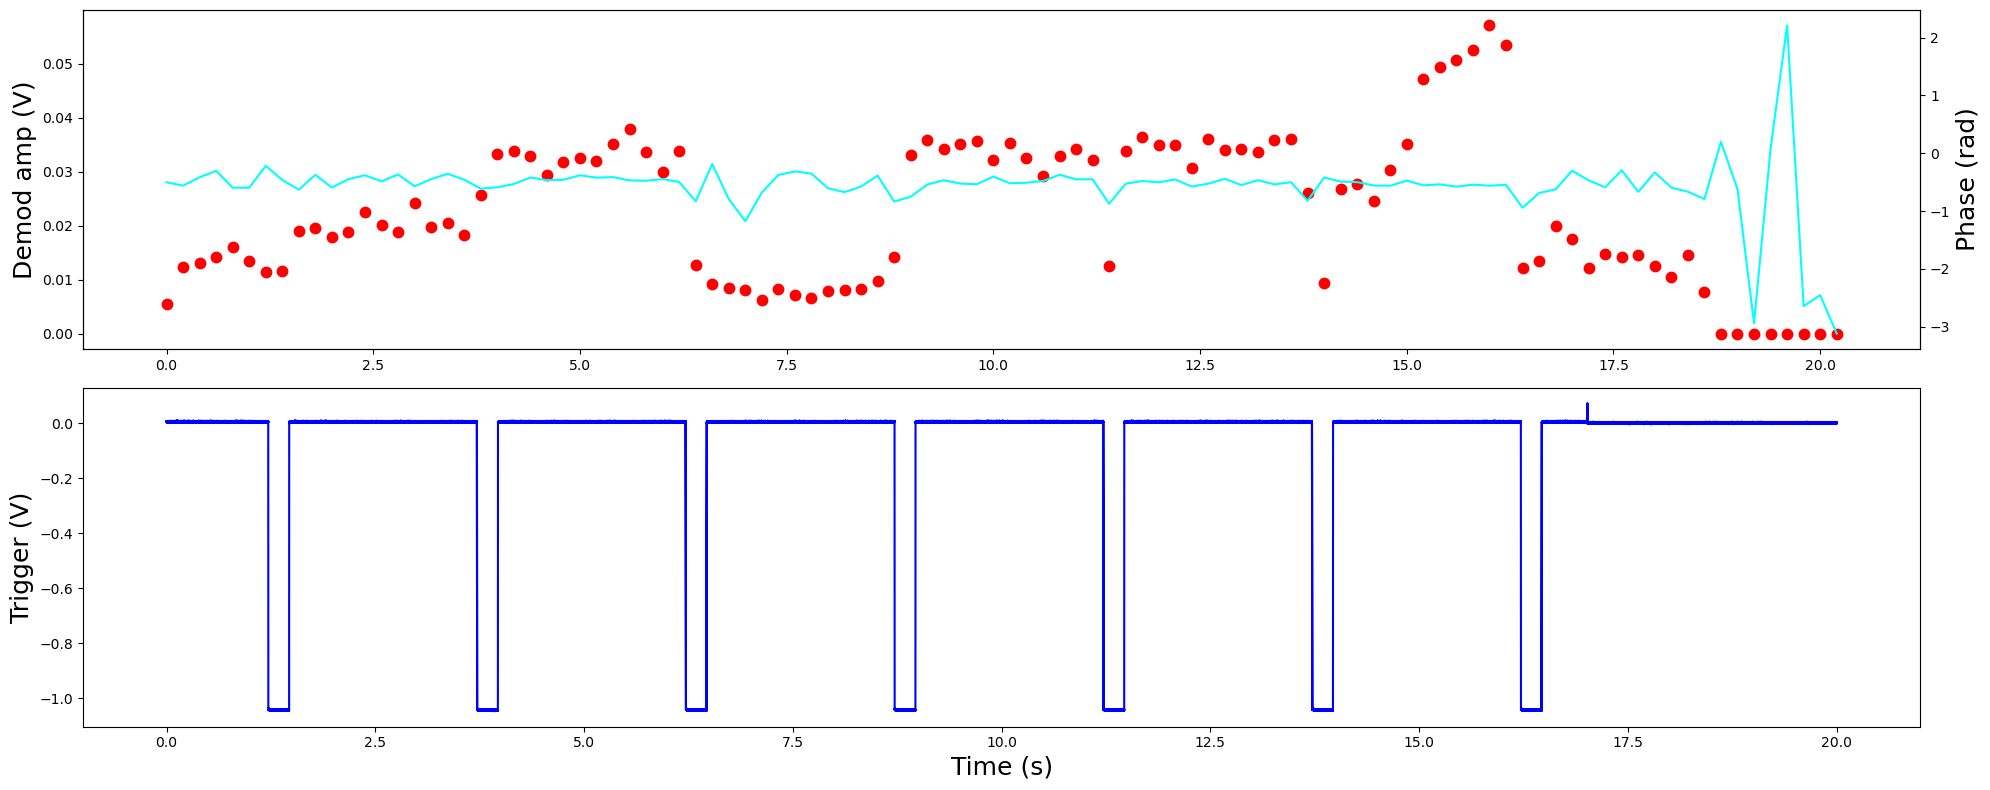

In [6]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

There are 2e charges on the sphere.

In [19]:
drive_freq = 72000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240306_charging_40vp2p_1mbar_0vbias_p2.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_25200\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_25200\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


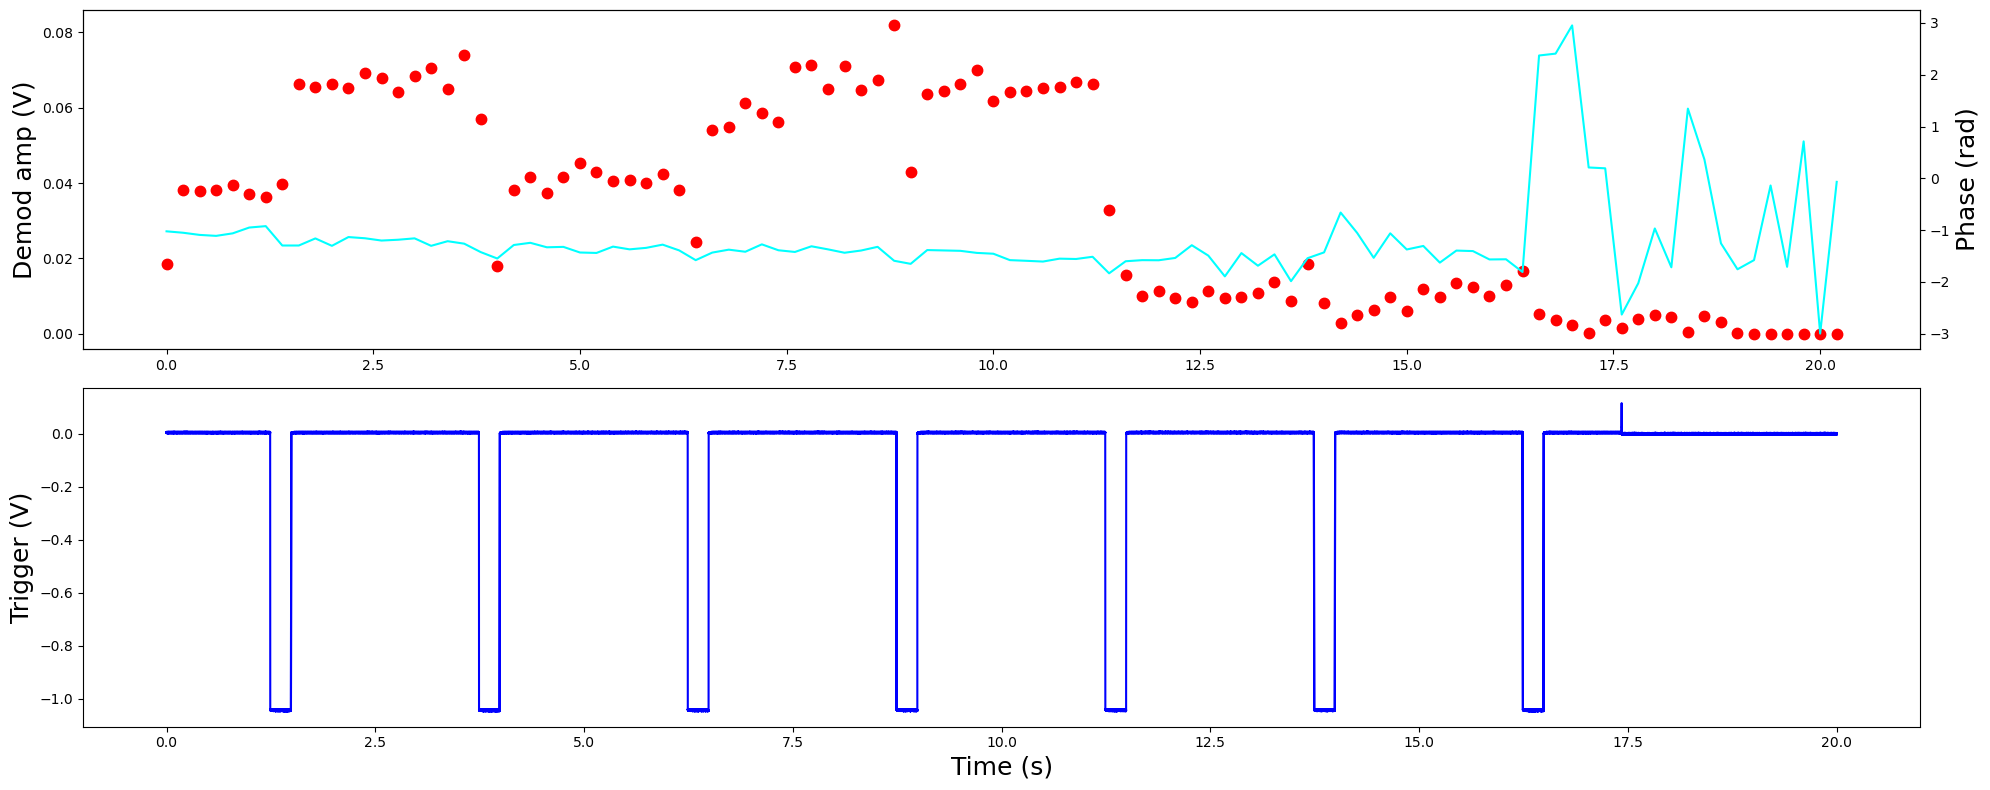

In [20]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [21]:
drive_freq = 72000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240306_charging_40vp2p_1mbar_0vbias_p2_2.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_25200\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_25200\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


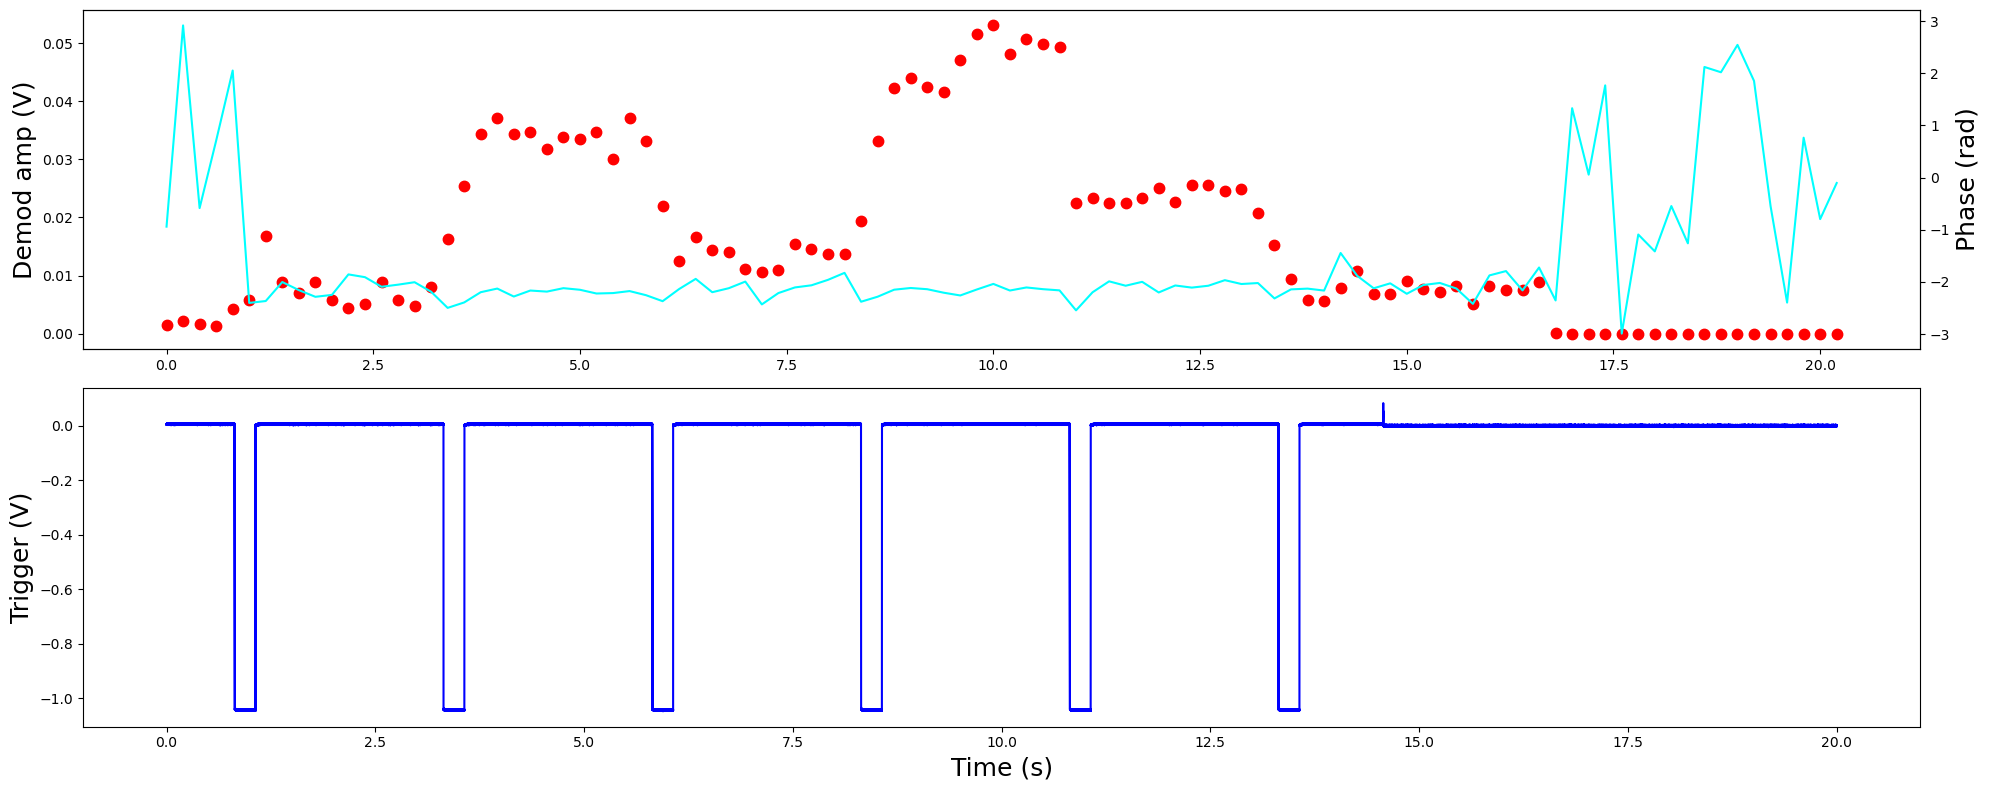

In [22]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

There is 1e charge on the sphere.

#### Continue on March 07

In [6]:
drive_freq = 70000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240307_charging_40vp2p_1mbar_0vbias.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


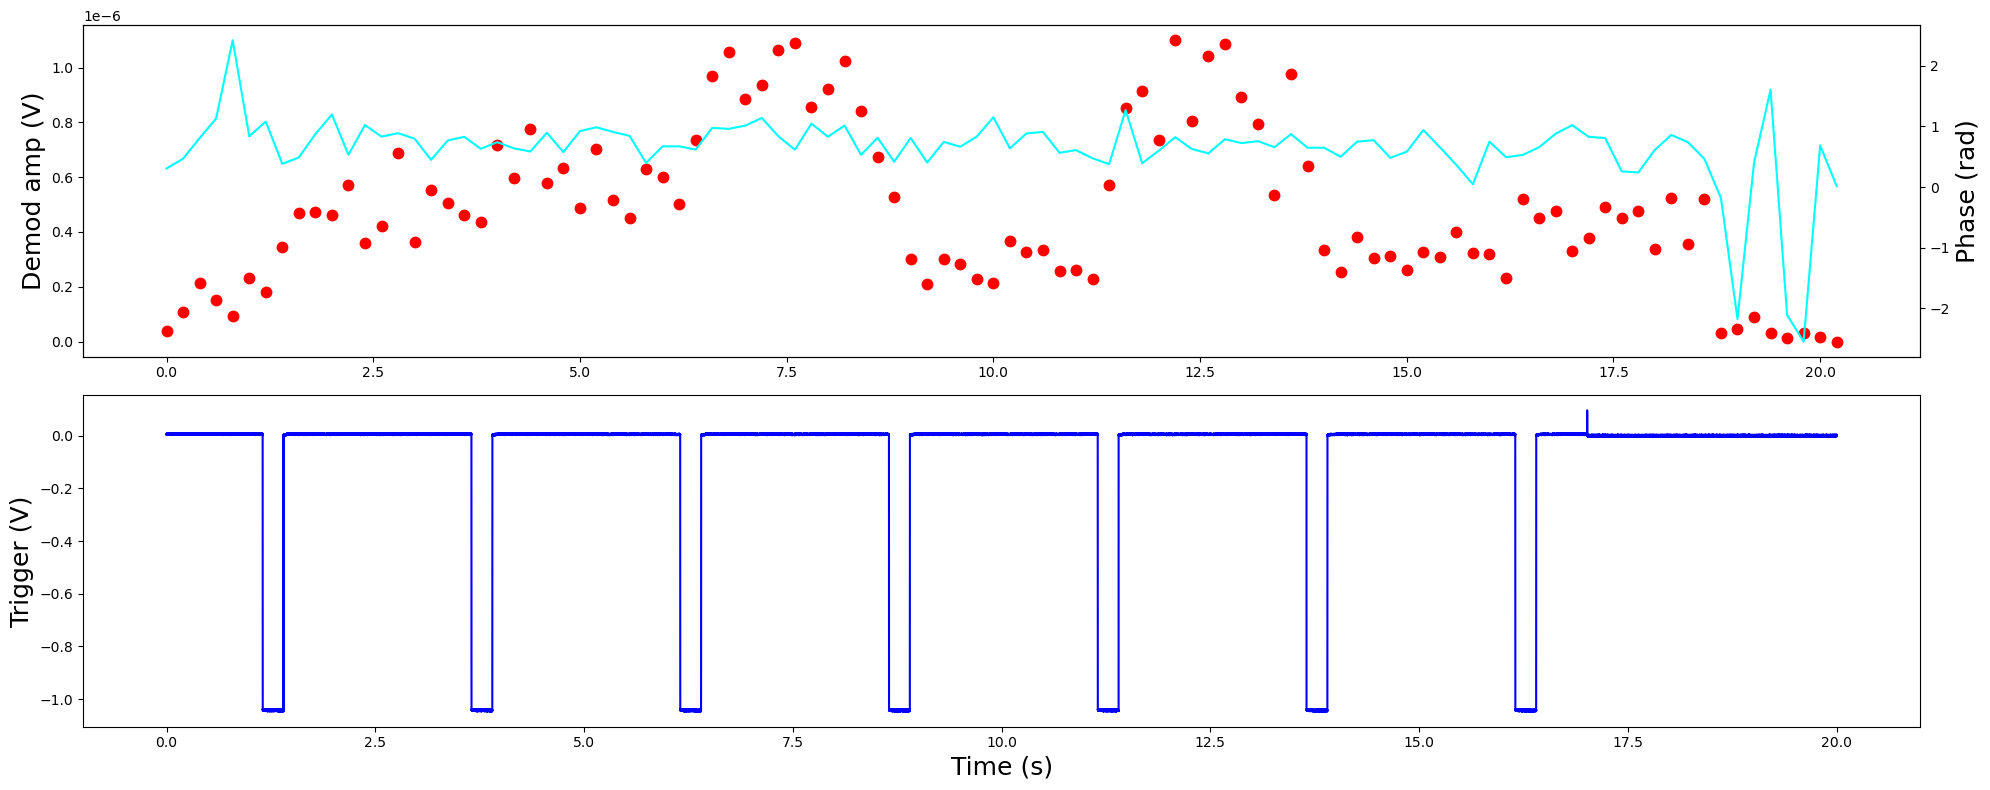

In [7]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [20]:
drive_freq = 72000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240307_charging_40vp2p_1mbar_0vbias_p2.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


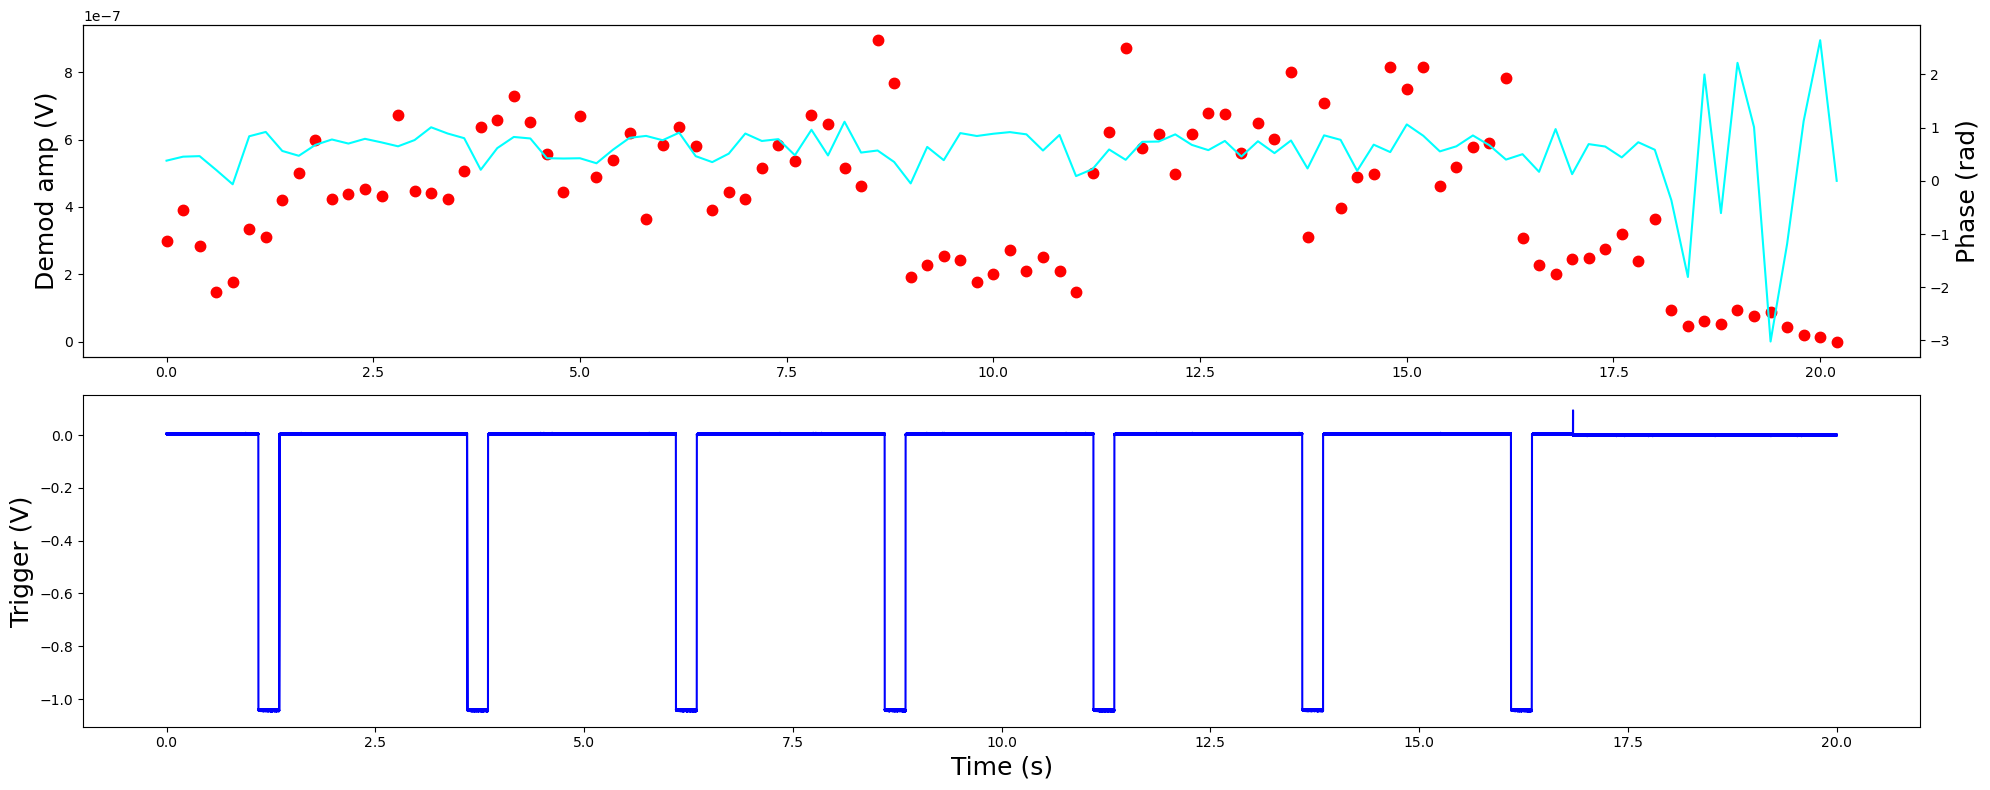

In [21]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [37]:
drive_freq = 72000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240307_charging_40vp2p_1mbar_0vbias_p2_2.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


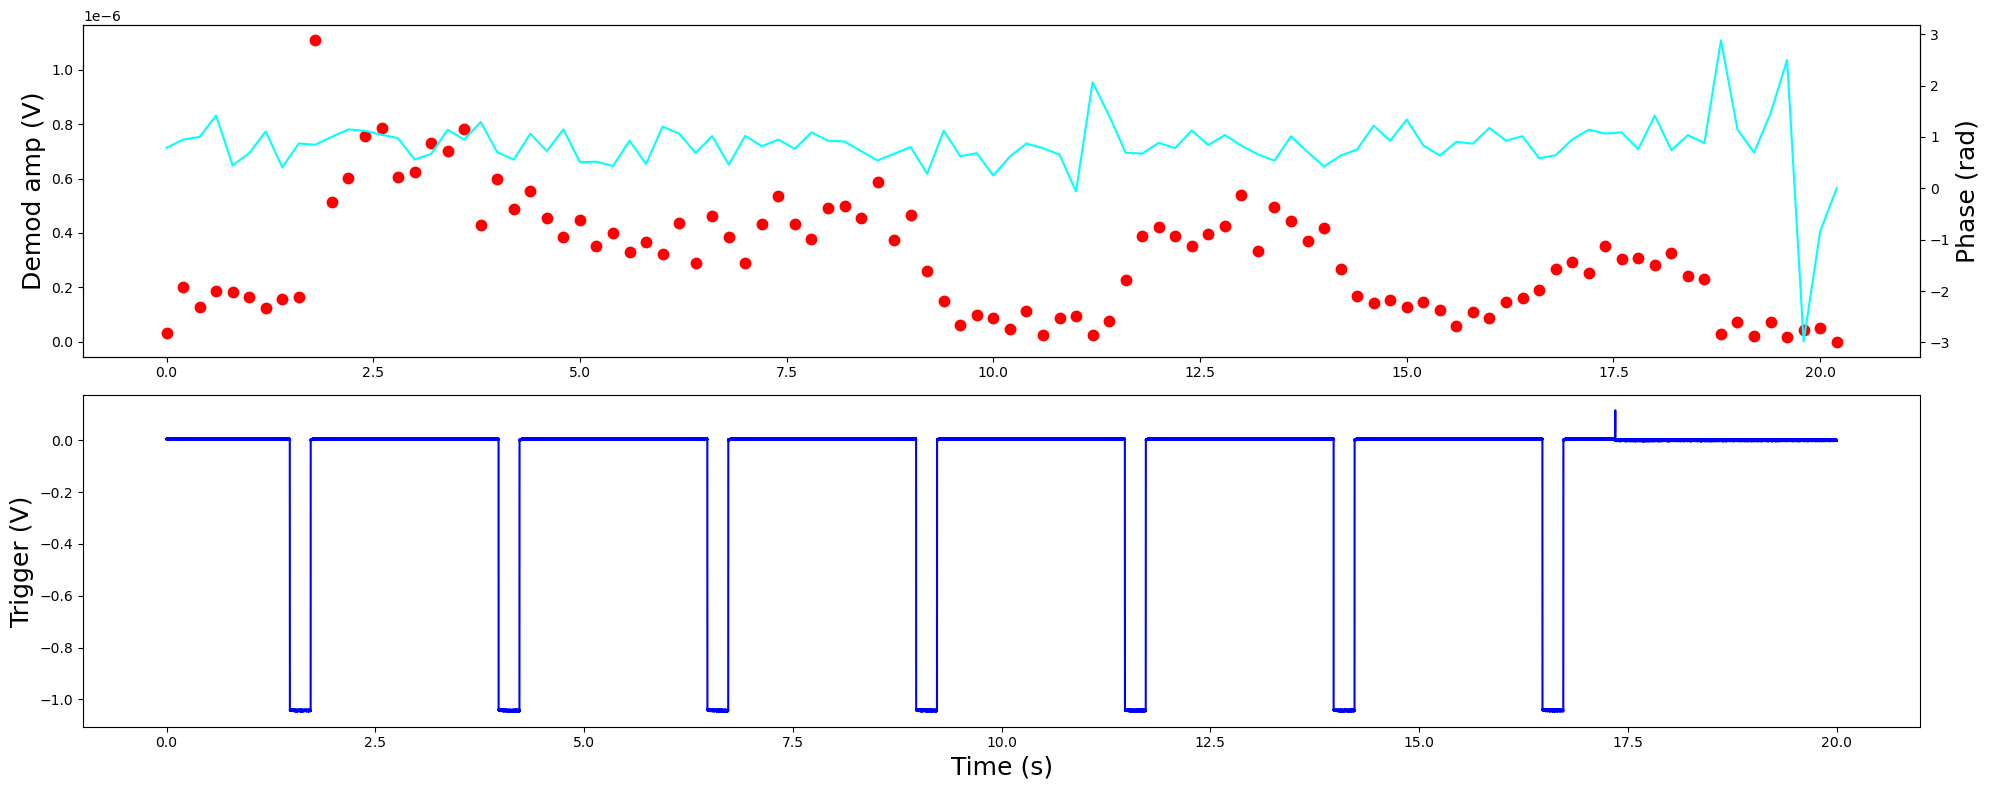

In [38]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [52]:
drive_freq = 72000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240307_charging_40vp2p_1mbar_0vbias_p2_8.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


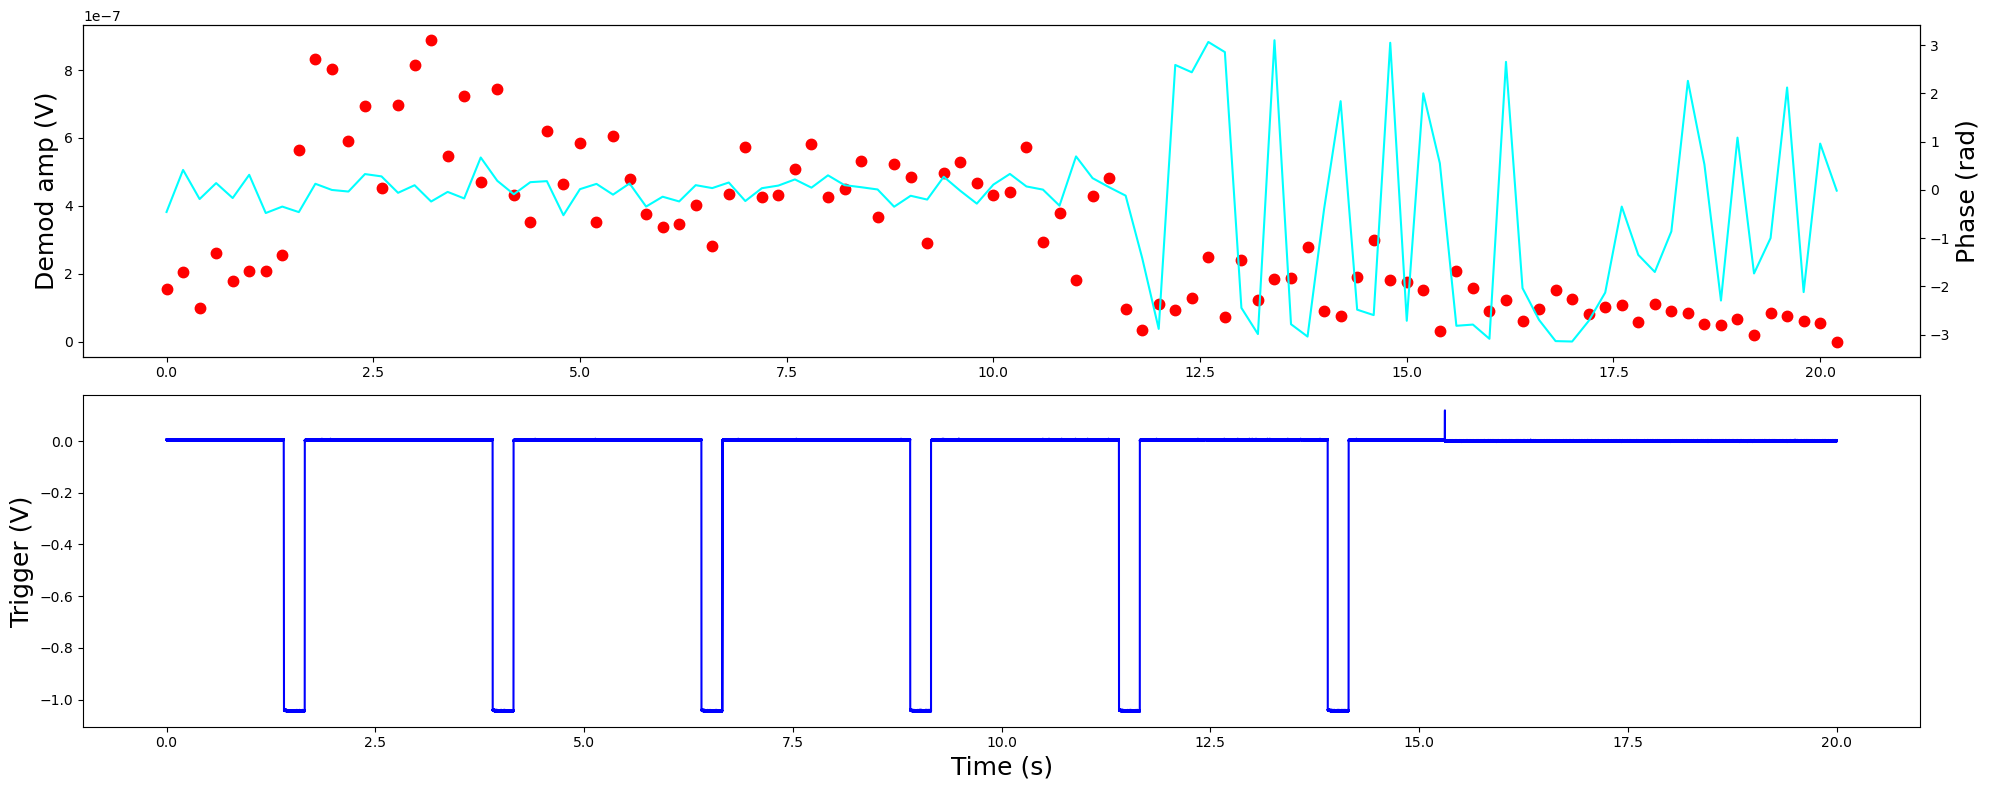

In [53]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [79]:
drive_freq = 72000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240307_charging_40vp2p_1mbar_0vbias_p2_11.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


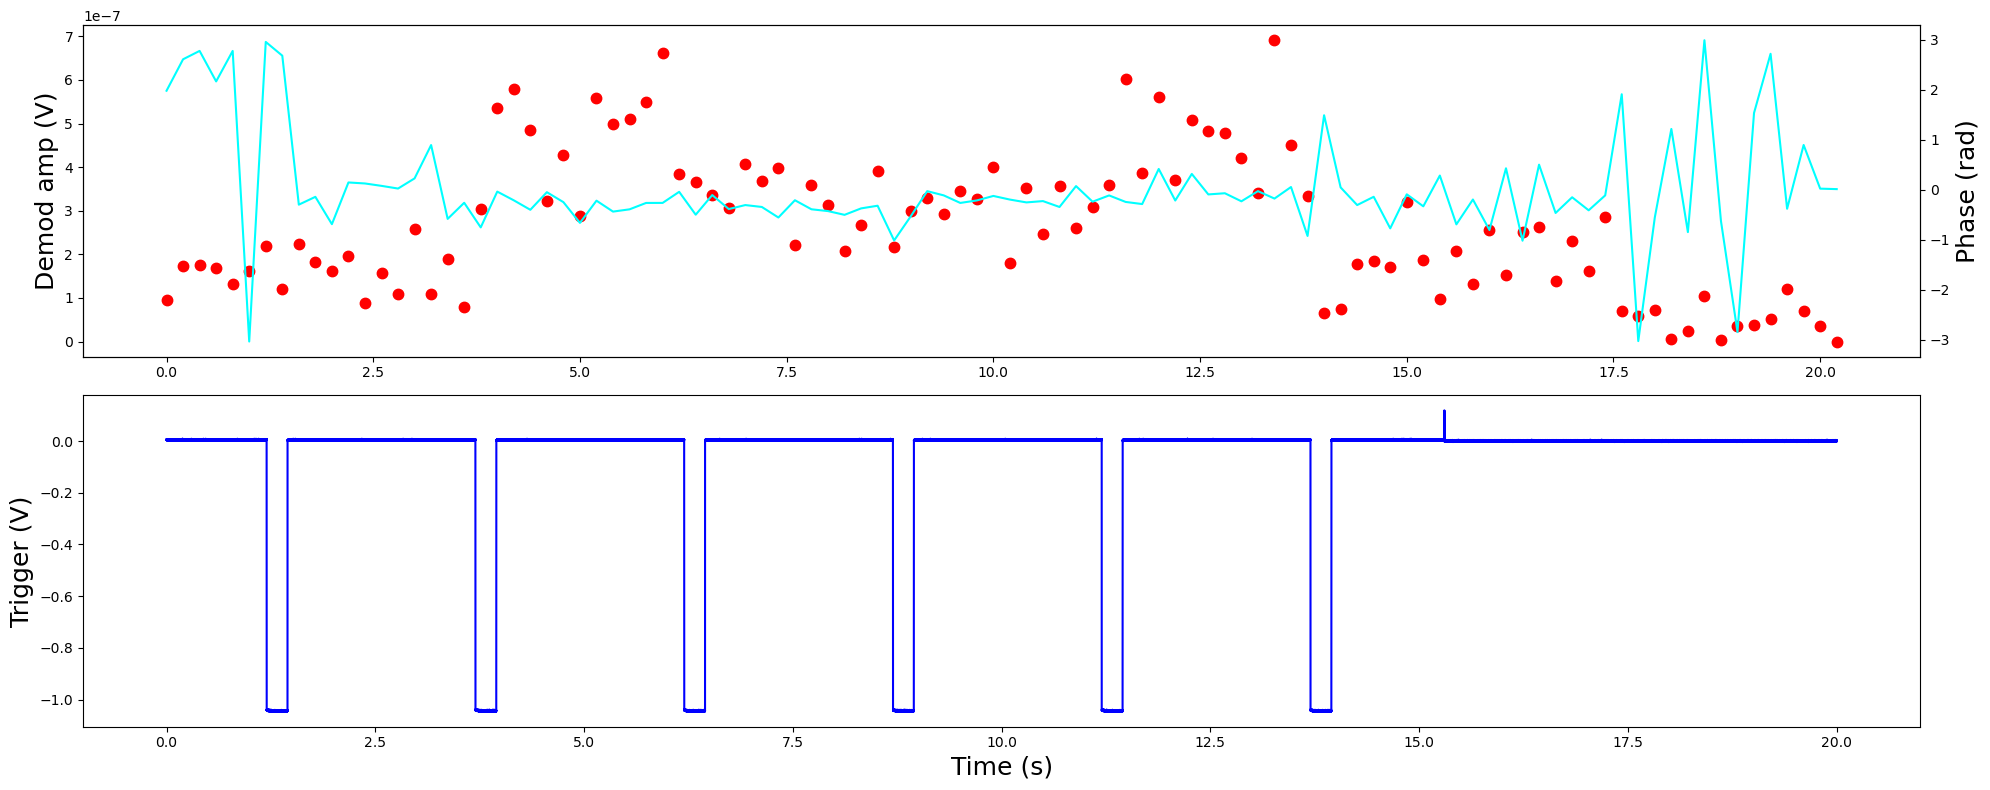

In [80]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

#### Continue on March 11

In [96]:
drive_freq = 68000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240311_charging_40vp2p_1mbar_0vbias.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


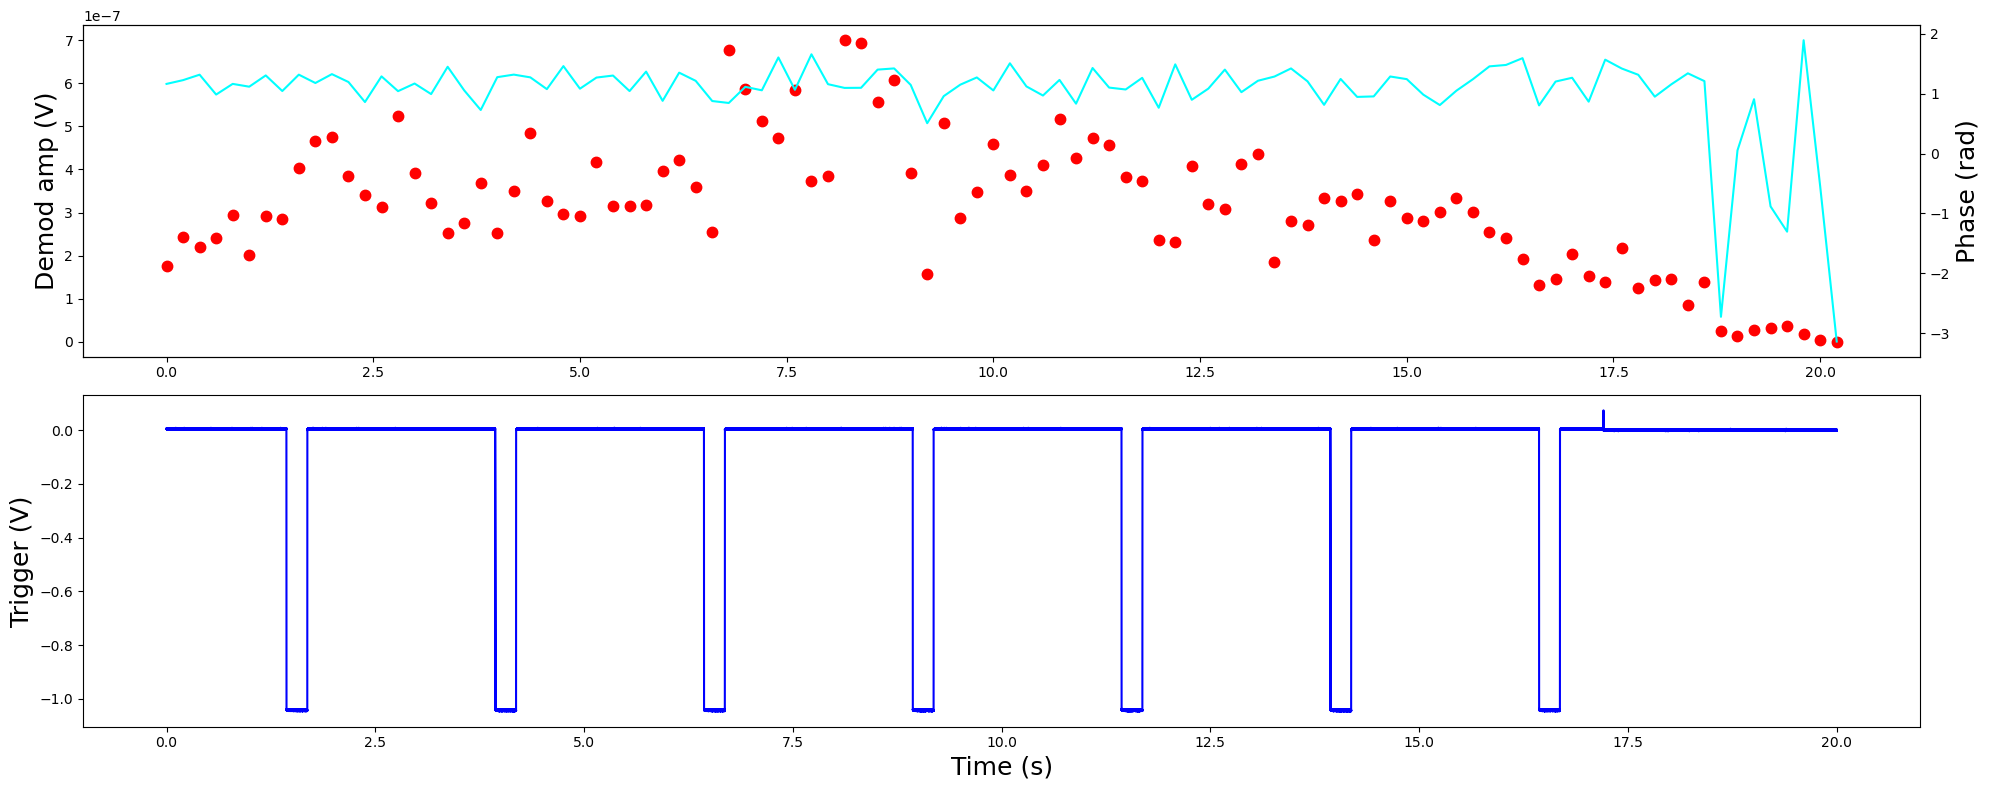

In [97]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [115]:
drive_freq = 69000
# data_file = r"C:\Users\yuhan\Documents\Data\charging\20240311_charging_40vp2p_1mbar_0vbias_3.csv"
# data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


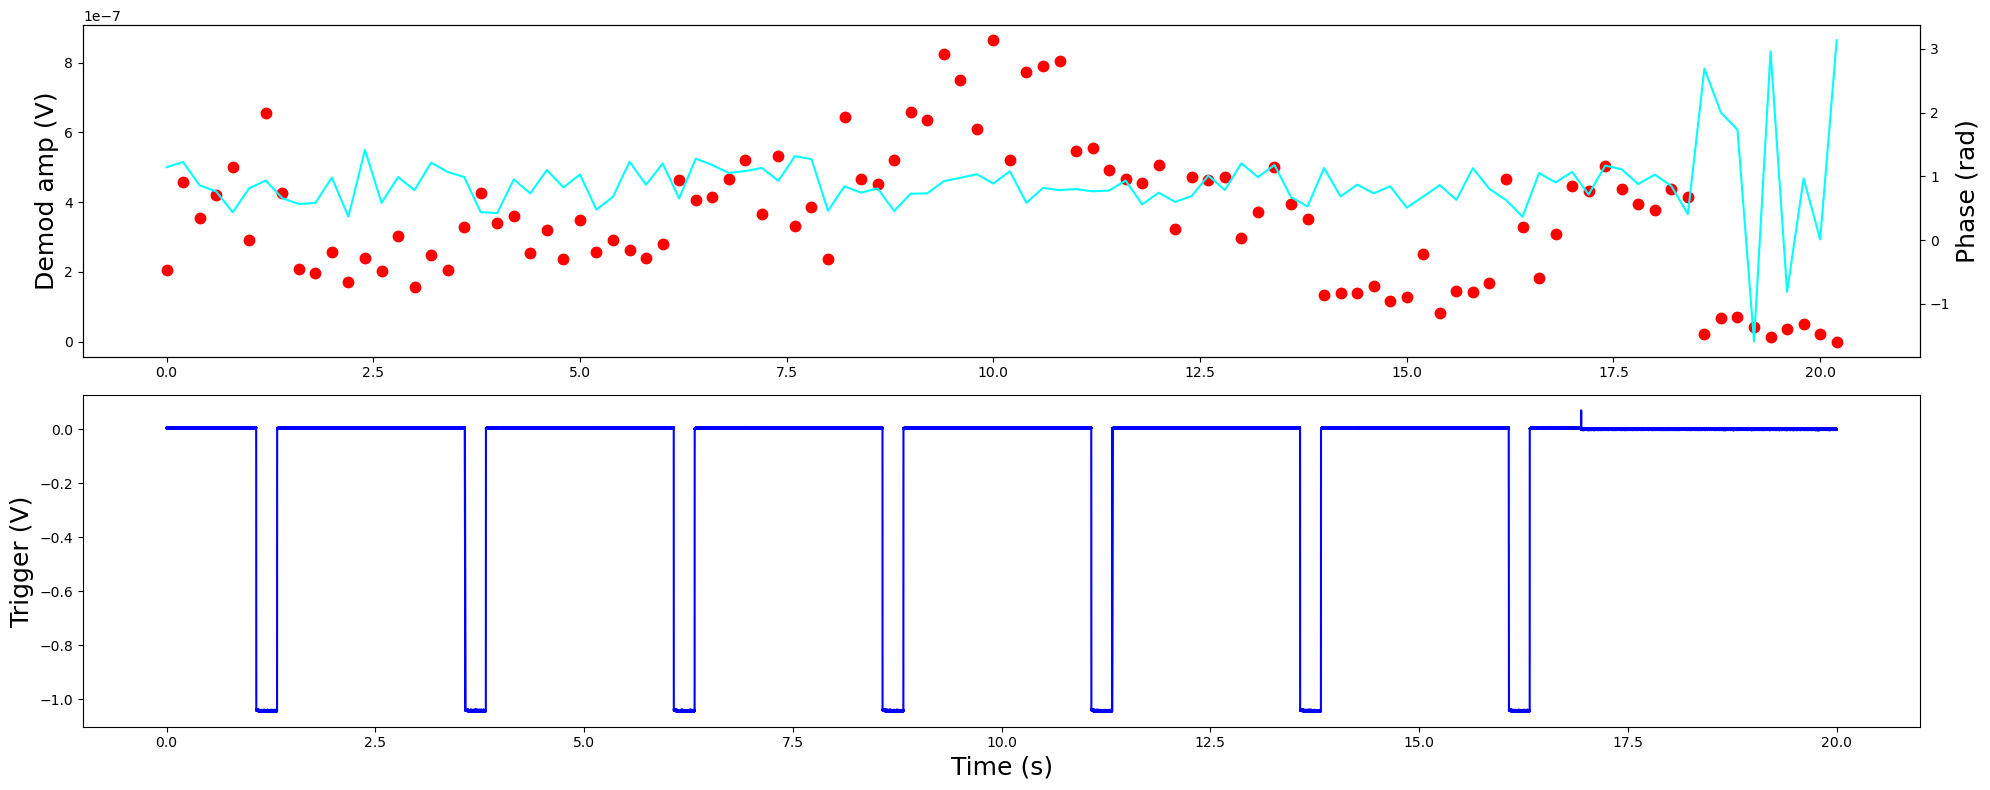

In [116]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [128]:
drive_freq = 69000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240311_charging_20vp2p_1mbar_0vbias_4.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\780037513.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\780037513.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


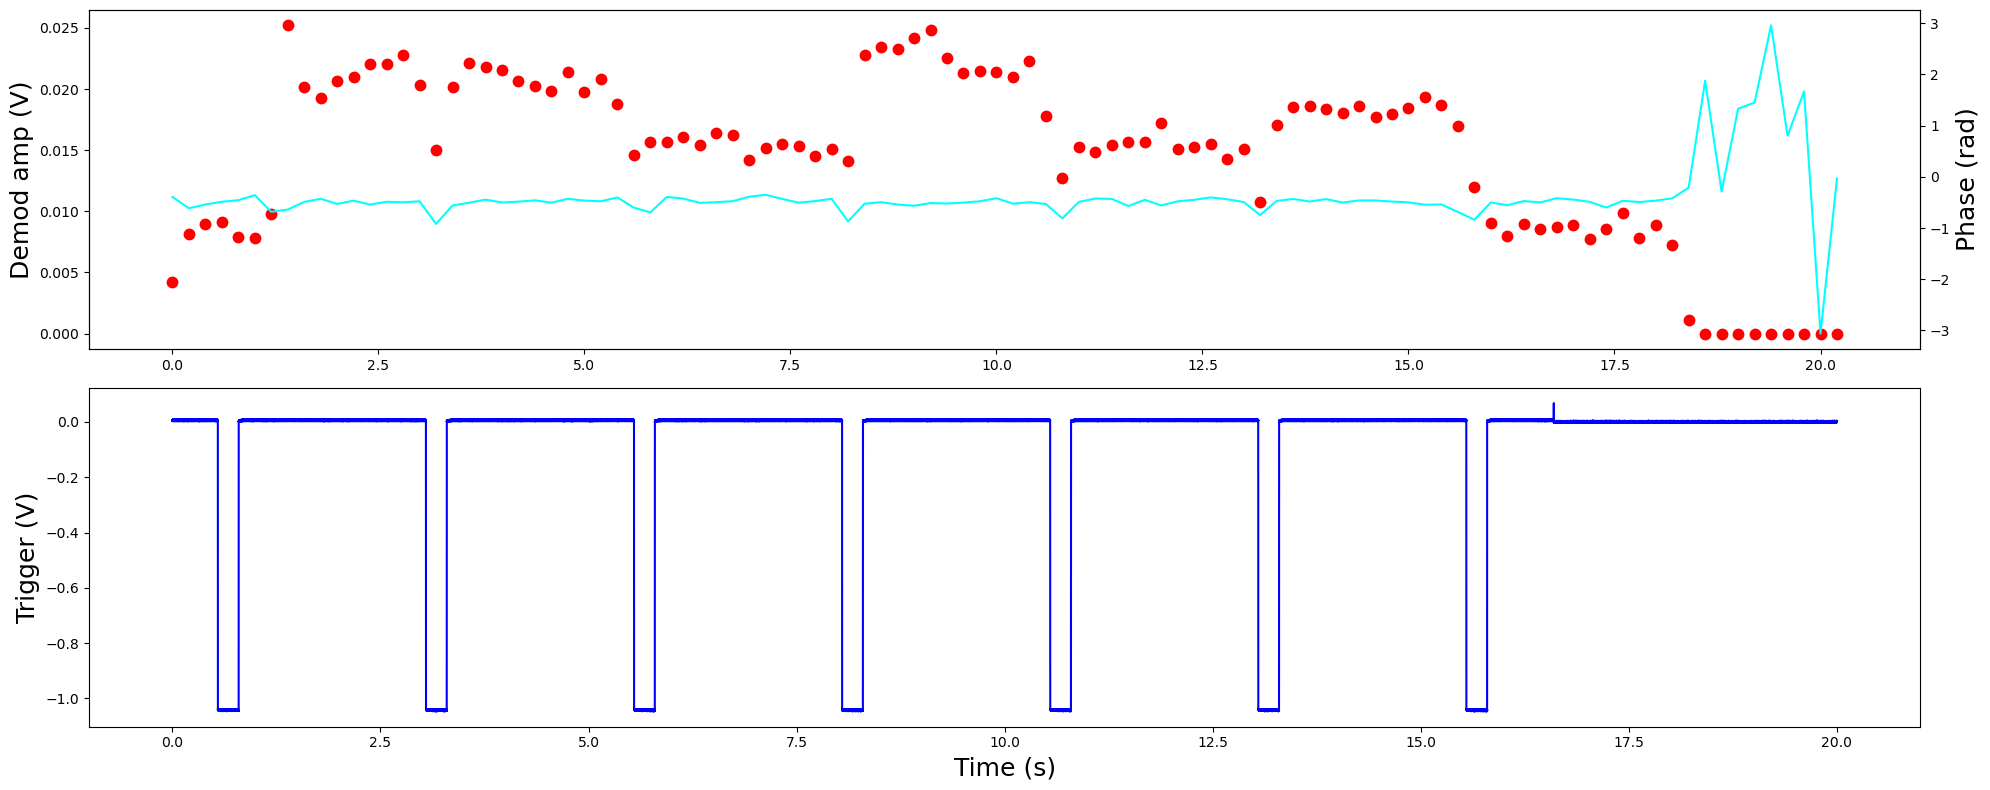

In [131]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [133]:
drive_freq = 69000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240311_charging_20vp2p_1mbar_0vbias_5.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


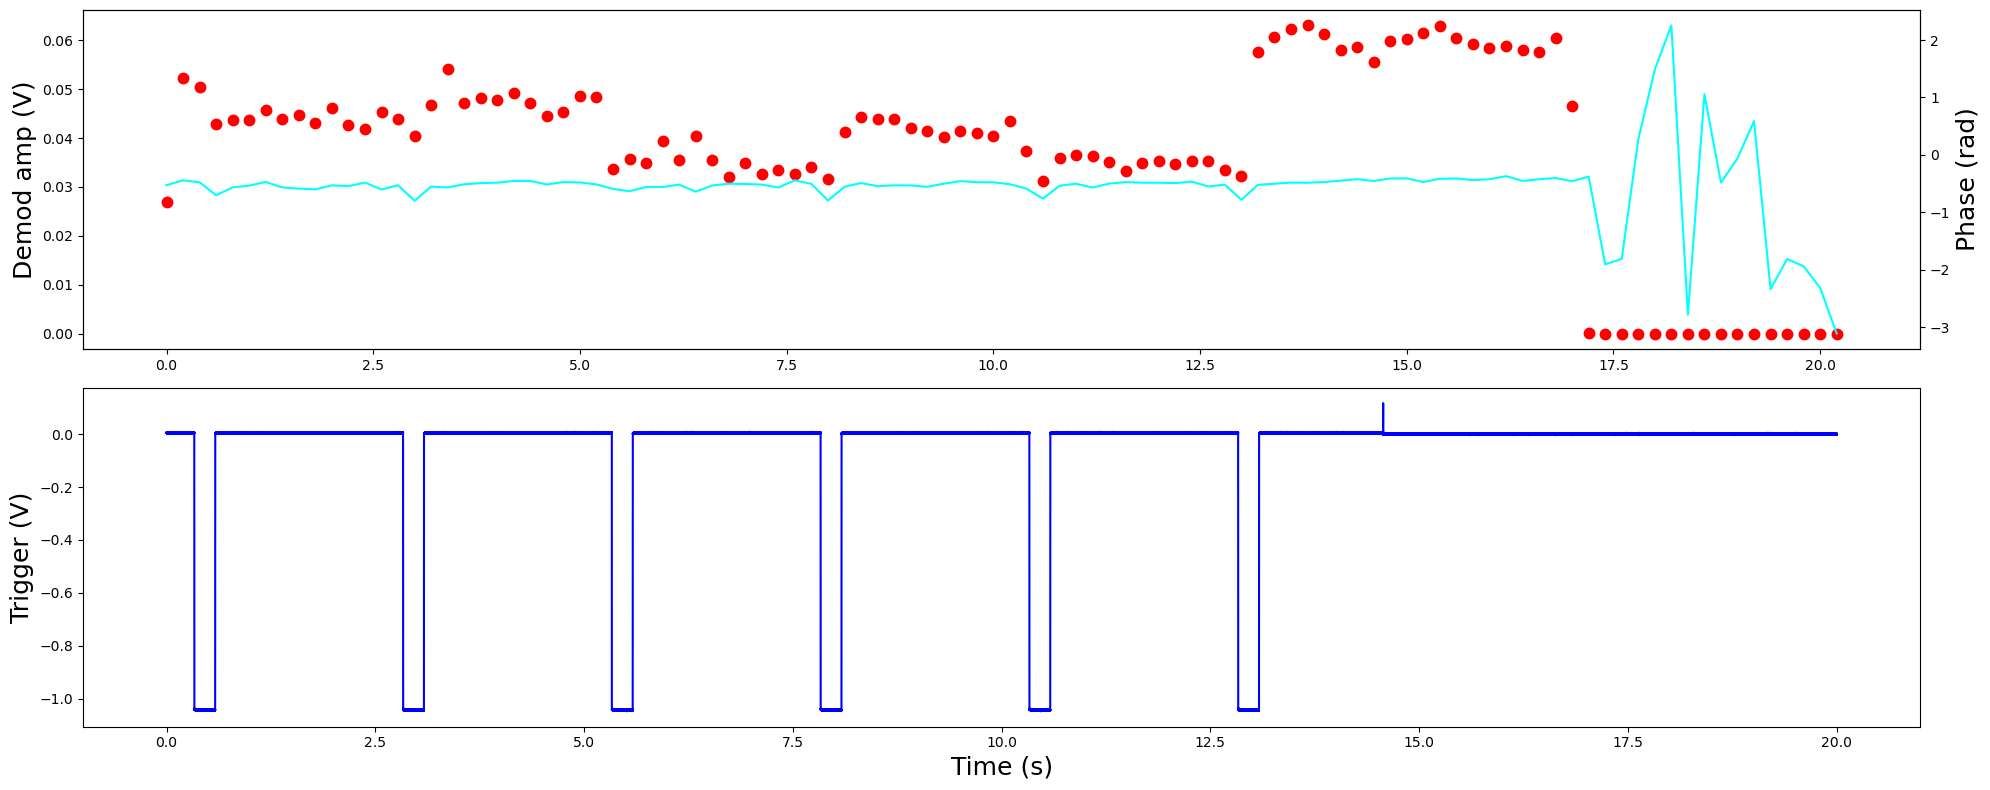

In [134]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [135]:
drive_freq = 69000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240311_charging_20vp2p_1mbar_0vbias_6.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


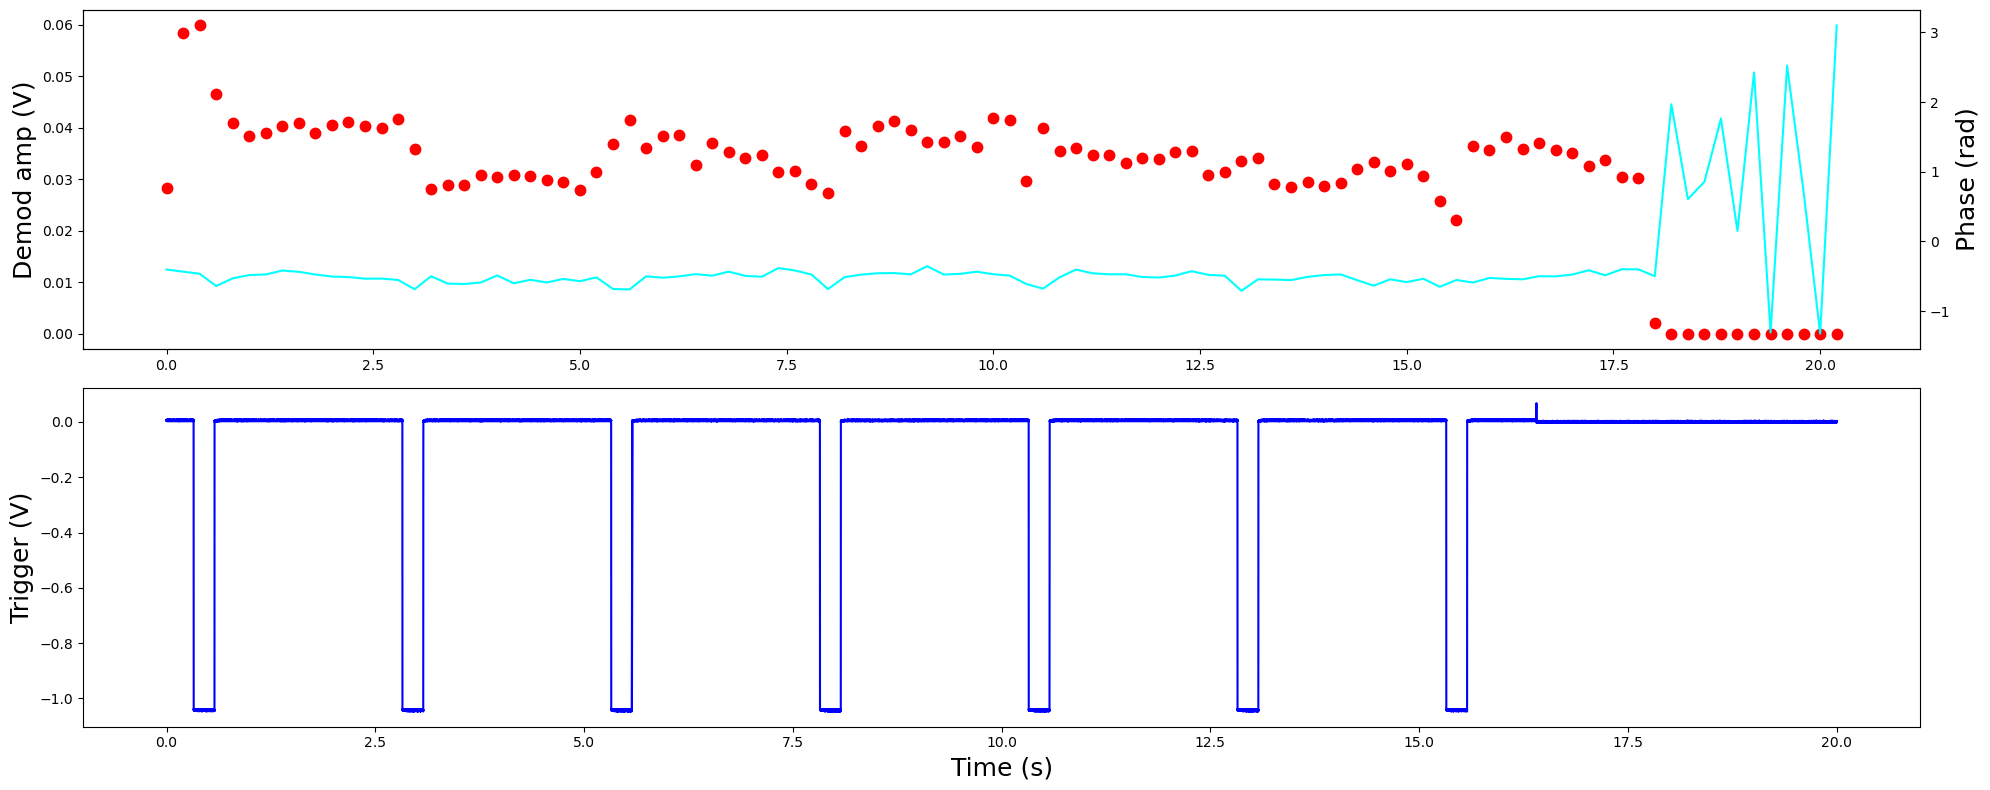

In [136]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [137]:
drive_freq = 69000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240311_charging_20vp2p_1mbar_0vbias_7.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


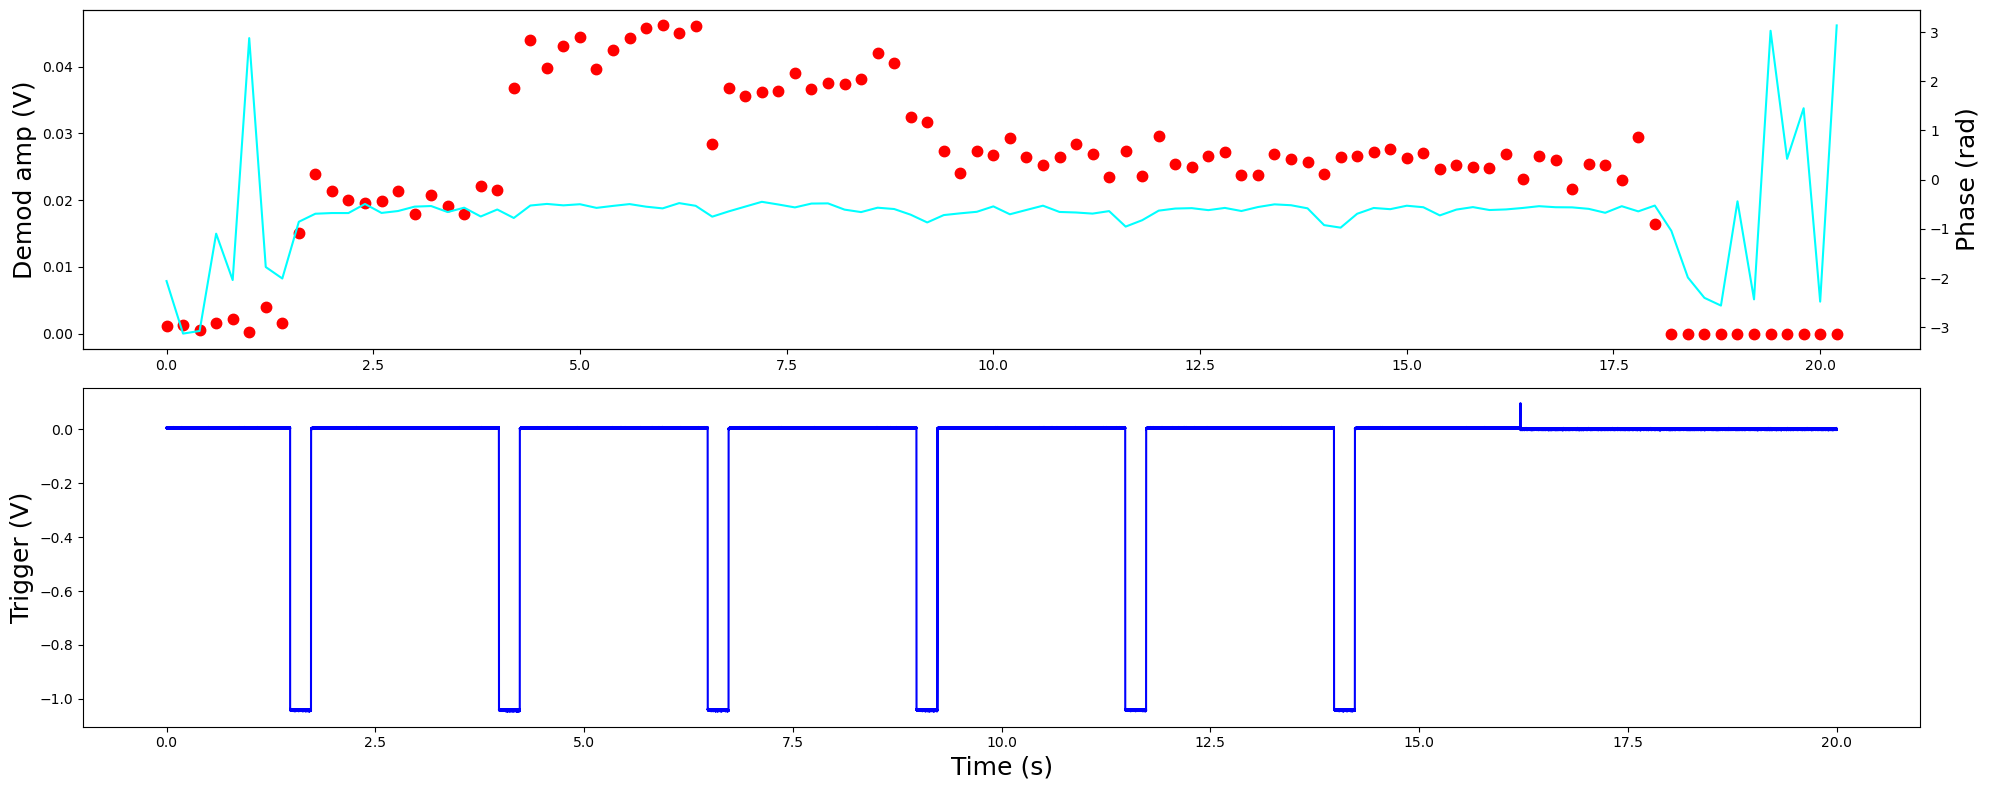

In [138]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

In [149]:
drive_freq = 69000
data_file = r"C:\Users\yuhan\Documents\Data\charging\20240311_charging_20vp2p_1mbar_0vbias_8.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ii[i] = np.sum(corr_i.T[i][farg-delta_arg:farg+delta_arg])
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11216\604706701.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  qq[i] = np.sum(corr_q.T[i][farg-delta_arg:farg+delta_arg])


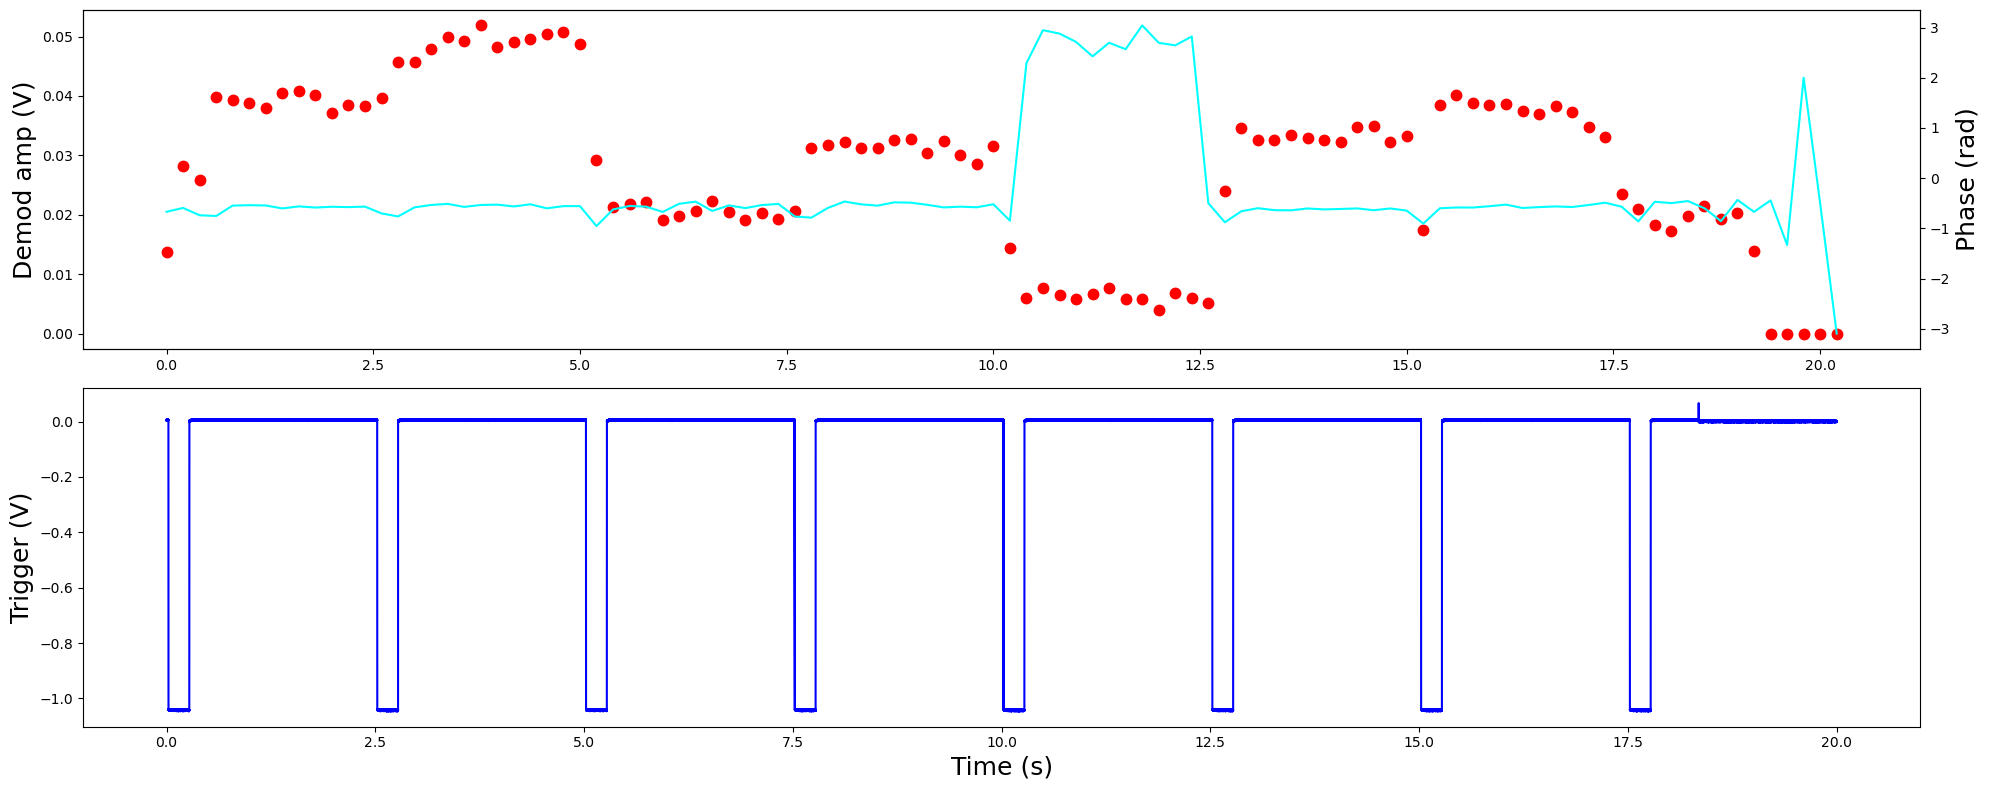

In [150]:
tt, amp, phase = quad_demod_fourier(data, drive_freq)

fig, ax = plt.subplots(2, 1, figsize = (20, 8))
ax_twin = ax[0].twinx()

ax[0].plot(tt, amp, 'r.', markersize=15)
ax[1].plot(data[0], data[2], 'b')

ax_twin.plot(tt, phase, 'cyan')
ax_twin.set_ylabel('Phase (rad)', fontsize=18)
ax_twin.tick_params(axis='y', color='k')

ax[0].set_ylabel('Demod amp (V)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)
ax[1].set_ylabel('Trigger (V)', fontsize=18)

fig.tight_layout()
plt.show()

There are 3e charges on the sphere.

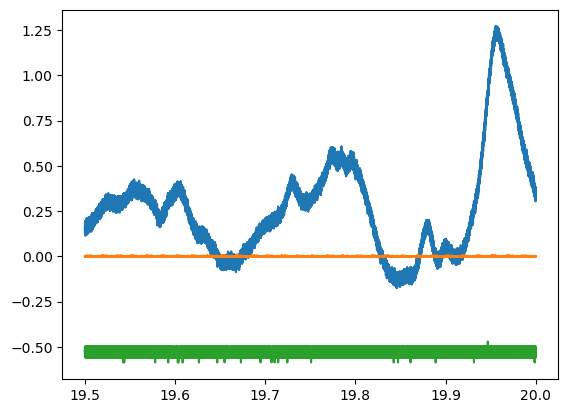

In [151]:
idx = np.logical_and(data[0]>19.5, data[0]<20)
plt.plot(data[0][idx], data[1][idx])
plt.plot(data[0][idx], data[2][idx])
plt.plot(data[0][idx], data[3][idx])

In [152]:
def peak_func(x, amp, omega_0, gamma):
    """A Lorentzian line shape"""
    return amp * gamma / ( ( omega_0**2 - x**2)**2 + gamma**2 * x**2 )

def fit_peak(x, y, peak_func, p0=None):
    popt, pcov = curve_fit(peak_func, x, y, p0=p0)
    
    # Return central frequency and gamma
    return popt, x, peak_func(x, *popt)

In [153]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
nperseg = fs / 10
ff, pp = welch(data[1][idx], fs=fs, nperseg=nperseg)

Amplitude: 50897567.021679364, central frequency: 67802.5585032545 Hz, gamma: 2529.8640227470123 Hz


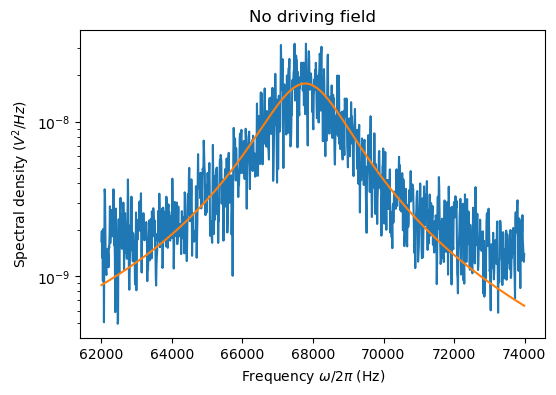

In [154]:
lb, ub = 6200, 7400

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ff[lb:ub], pp[lb:ub])

# Fit with a Lorentzian and plot
popt, omega_fit, p_fit = fit_peak(ff[lb:ub]*2*np.pi, pp[lb:ub], peak_func, p0=[3e7, 70000*2*np.pi, 8000])
ax.plot(omega_fit/(2*np.pi), p_fit)

amp, omega0, gamma = popt[0], popt[1], popt[2]
print(f'Amplitude: {amp}, central frequency: {omega0/(2*np.pi)} Hz, gamma: {gamma/(2*np.pi)} Hz')

ax.set_title('No driving field')
ax.set_xlabel('Frequency $\omega / 2 \pi$ (Hz)')
ax.set_ylabel('Spectral density ($V^2 / Hz$)')
ax.set_yscale('log')

In [155]:
T   = 300  # K
kb  = 1.38e-23

# Use this value after ethanol is gone
rho = 2000 # kg/m^3
r   = 167e-9 / 2
m   = rho * (4 * np.pi / 3) * r**3 

# Again need to take care of 2 pi normalization
# because the formula assume integrating over `omega`, not `f`
v2 = 0.5 * np.pi/(gamma * omega0**2) * amp * gamma / (2 * np.pi)

# Calibration factor converting <V^2> to (x^2)
c_cal_square = (v2 * m * omega0**2) / (kb * T)
print(fr'Calibration factor square $c^2$: {c_cal_square}')

Calibration factor square $c^2$: 14990451784.850313


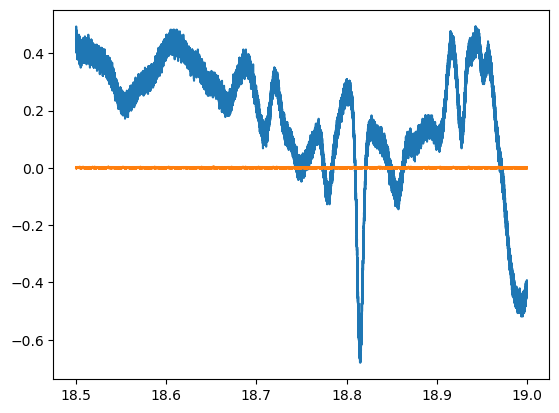

In [161]:
idx = np.logical_and(data[0]>18.5, data[0]<19)
plt.plot(data[0][idx], data[1][idx])
plt.plot(data[0][idx], data[2][idx])
# plt.plot(data[0][idx], data[3][idx])

In [162]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))
nperseg = fs / 10
ff, pp = welch(data[1][idx], fs=fs, nperseg=nperseg)

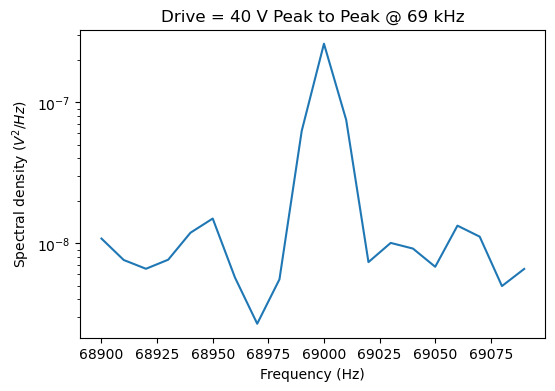

In [163]:
lb, ub = 6890, 6910

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ff[lb:ub], pp[lb:ub])

ax.set_title(f'Drive = 40 V Peak to Peak @ {int(drive_freq/1000)} kHz')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectral density ($V^2 / Hz$)')

ax.set_yscale('log')

In [164]:
all_idx = np.arange(lb, ub, 1)
excluding_peak = np.logical_or(all_idx < (lb+7), all_idx > (ub-7))

area_all = np.trapz(pp[all_idx], ff[all_idx]*2*np.pi)
area_excluding_peak = np.trapz( pp[all_idx[excluding_peak]], ff[all_idx[excluding_peak]]*2*np.pi )

# Excluding background contribution (which is very small)
# Take care of 2 pi normalization after numerical integration
# because we integrated over omega here
v2_drive = (area_all - area_excluding_peak) / (2 * np.pi)

In [165]:
vp2p = 40
omega_drive = drive_freq * 2 * np.pi

x2_drive = v2_drive / c_cal_square
f_amp_squared = x2_drive * 2 * m**2 * ( (omega0**2 - omega_drive**2)**2 + gamma**2 * omega_drive**2)

charge = np.sqrt(f_amp_squared) / (1.6e-19 * 120 * (vp2p / 2))
print(f'Charge on the sphere derived through a driving E field: +/- {charge:.2f} e')

Charge on the sphere derived through a driving E field: +/- 2.67 e
